In [85]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [88]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # YOUR CODE HERE

    f = numpy.array(f)
    F = numpy.array(F)
    e = numpy.abs(f-F)
    r = e/numpy.abs(f)
    
    p = (-numpy.log10(r / 5.0)).astype(int)

    return e, r, p



In [89]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [91]:
# you can put some working code here to generate your answers, but put your answers in the cell below
x1 = [numpy.pi,numpy.pi]
y1 = [22/7,355/113]
errors(x1,y1)

(array([1.26448927e-03, 2.66764189e-07]),
 array([4.02499435e-04, 8.49136788e-08]),
 array([4, 7]))

YOUR ANSWER HERE : Since the absolute error and relative error for $355 / 113$ are significantly smaller than those for $22 / 7$, we conclude that $355 / 113$ is the more accurate approximation of $\pi$.


**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [94]:
import math
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    # YOUR CODE HERE

    lower_bound = 10**(d-1)
    upper_bound = 10**d - 1
    pi_value = math.pi
    
    best_m, best_n = None, None
    min_error = float('inf')
    
    for n in range(lower_bound, upper_bound + 1):
        m = round(pi_value * n)
        
        if lower_bound <= m <= upper_bound:
            error = abs(pi_value - m / n)
            
            if error < min_error:
                min_error = error
                best_m, best_n = m, n
    
    return best_m, best_n    


In [95]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

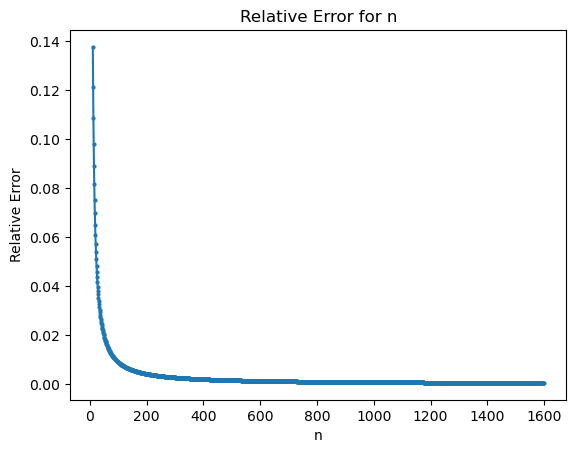

In [97]:
# YOUR CODE HERE
import math
import numpy as np

def calculate_log_factorial(n):
    if n == 0:
        return 1
    else:
        return sum([np.log(i) for i in range(1, n + 1)])

n_values = list(range(10, 1600))
approx_values = np.array([j * np.log(j) - j for j in n_values])
exact_values = np.array([calculate_log_factorial(i) for i in n_values])
relative_error = np.abs(exact_values - approx_values) / np.abs(exact_values)

plt.plot(n_values, relative_error, marker='o', markersize=2)
plt.title("Relative Error for n")
plt.xlabel("n")
plt.ylabel("Relative Error")
plt.show()

Text(0, 0.5, 'Degree Precision')

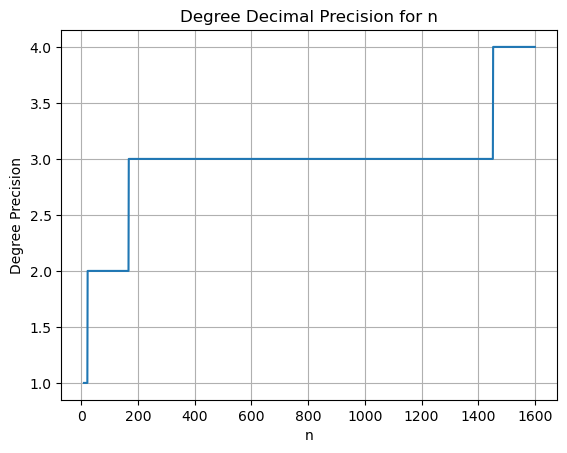

In [98]:
decimal_p = numpy.floor(-numpy.log10(relative_error/5))
x=n_values
plt.plot(x,decimal_p)
plt.grid(10)
plt.title("Degree Decimal Precision for n")
plt.xlabel("n")
plt.ylabel("Degree Precision")

The smallest value of n to make 4 decimal place is around 1450.

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


### Sum of the Taylor Series:

We are given:

$$
\frac{1}{1-\Delta x} + \cosh(\Delta x) = (1+\Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)) + \left(1+\frac{\Delta x^2}{2!}+\frac{\Delta x^4}{4!} + O(\Delta x^6)\right)
$$

We have:

$$
\frac{1}{1-\Delta x} + \cosh(\Delta x) = 2 + \Delta x + \Delta x^2 \left( 1 + \frac{1}{2!} \right) + \Delta x^3 + \frac{\Delta x^4}{4!} + O(\Delta x^4)
$$

Simplifying:

$$
\frac{1}{1-\Delta x} + \cosh(\Delta x) = 2 + \Delta x + \frac{3 \Delta x^2}{2} + \Delta x^3 + O(\Delta x^4)
$$

Thus, the sum is:

$$
\boxed{2 + \Delta x + \frac{3 \Delta x^2}{2} + \Delta x^3 + O(\Delta x^4)}
$$

### Product of the Taylor Series:

We compute the product:

$$
\left(\frac{1}{1-\Delta x}\right)\left(\cosh(\Delta x)\right) = \left(1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)\right) \cdot \left(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)\right)
$$

Multiplying the terms up to order \( O(\Delta x^4) \):

$$
\left(\frac{1}{1-\Delta x}\right)\left(\cosh(\Delta x)\right) = 1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + O(\Delta x^4)
$$

Thus, the product is:

$$
\boxed{1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + O(\Delta x^4)}
$$
\frac{3 \Delta x^3}{2} + O(\Delta x^4)}
$$


## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

### Error Analysis for the Taylor Series of \( e^x \)

We have that \( e^x = T_n(x) = R_n(x) \), where \( R_n(x) \) is the remainder term defined as:

$$
R_n = \frac{f^{n+1}(c)(x-x_{0})^{n+1}}{(n+1)!}
$$

In this case, we can express the relative error \( r_n \) as:

$$
r_n = \frac{|e^x - T_n(x)|}{|e^x|} = \frac{|R_n(x)|}{|e^x|}
$$

Substituting \( x_0 = 0 \), we have:

$$
r_n = \frac{f^{n+1}(c)(x-x_{0})^{n+1}}{(n+1)!|e^x|} = \frac{e^c x^{n+1}}{(n+1)! |e^x|} \leq \frac{x^{n+1}}{(n+1)!}
$$

Thus, the final result can be boxed as follows:

$$
\boxed{r_n \leq \frac{x^{n+1}}{(n+1)!}}
$$
+1}}{(n+1)!}
$$

**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

### Proving the Condition for Machine Epsilon

We need to demonstrate that:

$$
\frac{x^{n+1}}{(n+1)!} \leq \epsilon_{\text{machine}}
$$

This leads us to the inequality:

$$
x^{n+1} < (n+1)!
$$

Taking the logarithm of both sides, we get:

$$
(n+1) \log(x) < (n+1) \log(n+1) - (n+1)
$$

Rearranging this gives us:

$$
\log(x) < \log(n+1) - 1 
$$

Which can be expressed as:

$$
\log(x) + 1 < \log(n+1) 
$$

Or equivalently:

$$
\log(x) + \log(e) <log+1)
$$

For large values of \( n \), we can approximate \( \log(n+1) \) as \( \log(n) \):

$$
\log(x) + \log(e) < \log(n)
$$

This simplifies to:

$$
\log(e \cdot x) < \log(n)
$$

Therefore, we conclude that:

$$
n > e \cdot x
$$

Thus, we have shown the required condition, boxed as follows:

$$
\boxed{n > e \cdot x}
$$
 are done.f $n$, $log(n+1) = log(n)$:

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [108]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    #assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    # YOUR CODE HERE
    value=x
    assert isinstance(value, float)

    inverse_flag = False
    if value < 0:
        value = abs(value)
        inverse_flag = True
    
    MAX_TERMS = int(numpy.ceil(3 * value)) + 50
    
    coefficients = []
    for term in range(MAX_TERMS + 1):
        coefficients.append(1 / factorial(term))    
    coefficients.reverse()
    
    Taylor_approximation = coefficients[0]
    for coefficient in coefficients[1:]:
        Taylor_approximation = Taylor_approximation * value + coefficient
    
    if inverse_flag:
        Taylor_approximation = 1 / Taylor_approximation
    
    return Taylor_approximation, MAX_TERMS



In [109]:
# Feel free to test your code here and/or make a plot of errors

In [110]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [112]:
numpy_exp_709 = numpy.exp(709)
approximation_709 = Tn_exp(709.)[0]

relative_error = abs(numpy_exp_709 - approximation_709) / abs(numpy_exp_709)
print("Relative Error is:", relative_error / eps, "machine epsilons.")

numpy_exp_709 = numpy.exp(709)
numpy_exp_1_709 = numpy.exp(1) ** 709

relative_error2 = abs(numpy_exp_709 - numpy_exp_1_709) / abs(numpy_exp_709)
print("Relative Error is:", relative_error2 / eps, "machine epsilons.")


Relative Error is: 4503599627370496.0 machine epsilons.
Relative Error is: 170.0702257577037 machine epsilons.


## Answer

The relative error between $$ f = \text{numpy.exp}(709) $$ and my routine is:

**Relative Error:** $$ 4503599627370496.0 $$ machine epsilon. 

For the comparison between $$ f = \text{numpy.exp}(709) $$ and $$ F = \left( \text{numpy.exp}(1) \right)^{709} $$:

**Relative Error:** $$ 170.0702257577037 $$ machine epsilon.
silon.
psilons.


**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [115]:
raise NotImplementedError()

NotImplementedError: 

In [ ]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

## Numbers We Can Represent

Given the following values:

- \( d_1 = 3 \)
- \( d_2 = 4 \)
- \( d_3 = 4 \)
- \( E = 7 \)

We can calculate \( f \) as follows:

$$
f = \pm d_1 \cdot d_2 \cdot d_3 \times 4^E
$$

The total number of representable values is:

$$
\text{total numbers} = 3 \cdot 3 \cdot 4 \cdot 16384 + 1 = 673
$$

### Underflow and Overflow

- **Underflow**: 
  $$
  1.00 \times 4^{-3} = 0.015625
  $$

- **Overflow**: 
  $$
  3.33 \times 4^3 = 252.0
  $$

### Machine Epsilon

Machine epsilon is the smallest number such that:

$$
4^{-2} = 0.0625
$$
m: \( 333 \)
- **Machine Epsilon**: (depending on the precision used)
10^2= 333$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

In [ ]:
d1_values = [1, 2, 3]
d2_values = [0, 1, 2, 3]
d3_values = [0, 1, 2, 3]
E_values = [3, 2, 1, 0, -1, -2, -3]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for exponent in E_values:
    for d1 in d1_values:
        for d2 in d2_values:
            for d3 in d3_values:
                axes.plot((d1 + d2 + d3 * 0.25) * 4**exponent, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 + d3 * 0.25) * 4**exponent, 0.0, 'r+', markersize=20)

axes.plot(0.0, 0.0, 'r+', markersize=20)

axes.plot([-150, 150], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-150, 150])

plt.show()


**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

We saw that in base 4, our number of representations with \( p=3 \) and \( E \in [-3,3] \) is: 

$$
673
$$

For base 2:

$$
2 \times 1 \times 2 \times 2 \times 7 + 1 = 57
$$ 

This means we can store 

$$
673 - 57 = \boxed{616}
$$ 

more numbers for base 4.
re numbers.